# **Airlines Customer Satisfaction Model**

## **Installing Required Libraries**
This code block uses pip, the Python package installer, to install essential libraries needed for data analysis, visualization, and machine learning. Specifically, it installs:

* **matplotlib** for data visualization
* **seaborn** for statistical data visualization
* **numpy** for numerical operations
* **pandas** for data manipulation and analysis
* **scikit-learn** for machine learning algorithms

In [ ]:
!pip install matplotlib seaborn numpy pandas scikit-learn

## **Importing Necessary Libraries**
This code block imports various Python libraries that will be used throughout the project. Here's what each one is for:
* **pandas** for data manipulation and analysis.
* **numpy** for numerical operations.
* **seaborn** for data visualization, particularly for drawing attractive and informative statistical graphics.
* **pickle** for serializing and deserializing Python objects.
* **matplotlib.pyplot** for creating static, interactive, and animated visualizations.
* **train_test_split** from sklearn.model_selection for splitting the dataset into training and test sets.
* **accuracy_score** from sklearn.metrics to evaluate the performance of the machine learning model.
* **LogisticRegression** from sklearn.linear_model to perform logistic regression.
* **LabelEncoder** from sklearn.preprocessing to convert categorical variables into a form that could be provided to machine learning algorithms to do a better job in prediction.

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

## **Reading the Dataset**
This code block reads a CSV file named Invistico_Airline.csv using the pandas library and stores it in a DataFrame called df. The file contains the dataset that will be used for analysis and model training. The DataFrame df will hold the raw data, making it ready for subsequent data processing and analysis steps.

In [47]:
df = pd.read_csv("/content/Invistico_Airline.csv")

## **Displaying the First Few Rows of the Dataset**
This code block uses the head() function from the pandas library to display the first five rows of the DataFrame df. This is commonly done to get a quick overview of the dataset, including column names and the type of data in each column. It helps to understand the structure of the dataset before diving into data preprocessing and analysis.

In [48]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## **Checking for Missing Values in the Dataset**
This code block uses the isnull() method followed by sum() on the DataFrame df to count the number of missing values (NaN) in each column. This is a crucial step for data validation to ensure that all missing values have been successfully removed after the dropna() operation. If the output shows zero missing values for all columns, the dataset is ready for further analysis and model training.

In [49]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

## **Removing Missing Values from the Dataset**
This code block uses the dropna() function from the pandas library to remove any rows that contain missing values (NaN) in the DataFrame df. The inplace=True argument ensures that the changes are applied directly to the original DataFrame, without the need to create a new one. This step is important for data cleaning, ensuring that the dataset is free from incomplete records before proceeding with data analysis or model training.

In [50]:
df.dropna(inplace=True)

## **Label Encoding the Target Variable 'satisfaction'**
This code block applies Label Encoding to the target variable 'satisfaction'. It uses the LabelEncoder class from the sklearn.preprocessing package. The fit_transform() method is applied to the 'satisfaction' column of the DataFrame df, effectively converting categorical labels ('Yes' and 'No') into numerical values (usually 1 and 0). This step is essential for preparing the dataset for machine learning algorithms that require numerical input.

In [51]:
le = LabelEncoder()
df["satisfaction"] = le.fit_transform(df["satisfaction"])

## **Dropping Unwanted Columns from the DataFrame**
This code block removes specific columns from the DataFrame df that are considered irrelevant or redundant for the current analysis. Columns like "Type of Travel," "Customer Type," "Flight Distance," "Departure/Arrival time convenient," "Gate location," "Departure Delay in Minutes," "Arrival Delay in Minutes," "Age," and "Food and drink" are dropped. The drop method is used with axis=1 to indicate that columns should be dropped, and inplace=True ensures that the changes are made directly to the DataFrame.

In [52]:
df.drop(["Type of Travel", "Customer Type", "Flight Distance", "Departure/Arrival time convenient", "Gate location", "Departure Delay in Minutes", "Arrival Delay in Minutes", "Age", "Food and drink"], axis=1, inplace=True)

## **Generating a Heatmap of Feature Correlations**
This code block visualizes the correlation between different features in the dataset using a heatmap. It uses the seaborn library to create the heatmap based on the correlation matrix generated by the corr() method of the DataFrame df.

The heatmap uses the "YlGnBu" color map and annotates each cell with the corresponding correlation coefficient rounded to two decimal places. The plot is set to be 10x10 units in size for easier readability. This visualization helps to understand how different features are correlated with each other, which can be useful for feature selection and model building.

<ipython-input-53-25b451b0a716>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")


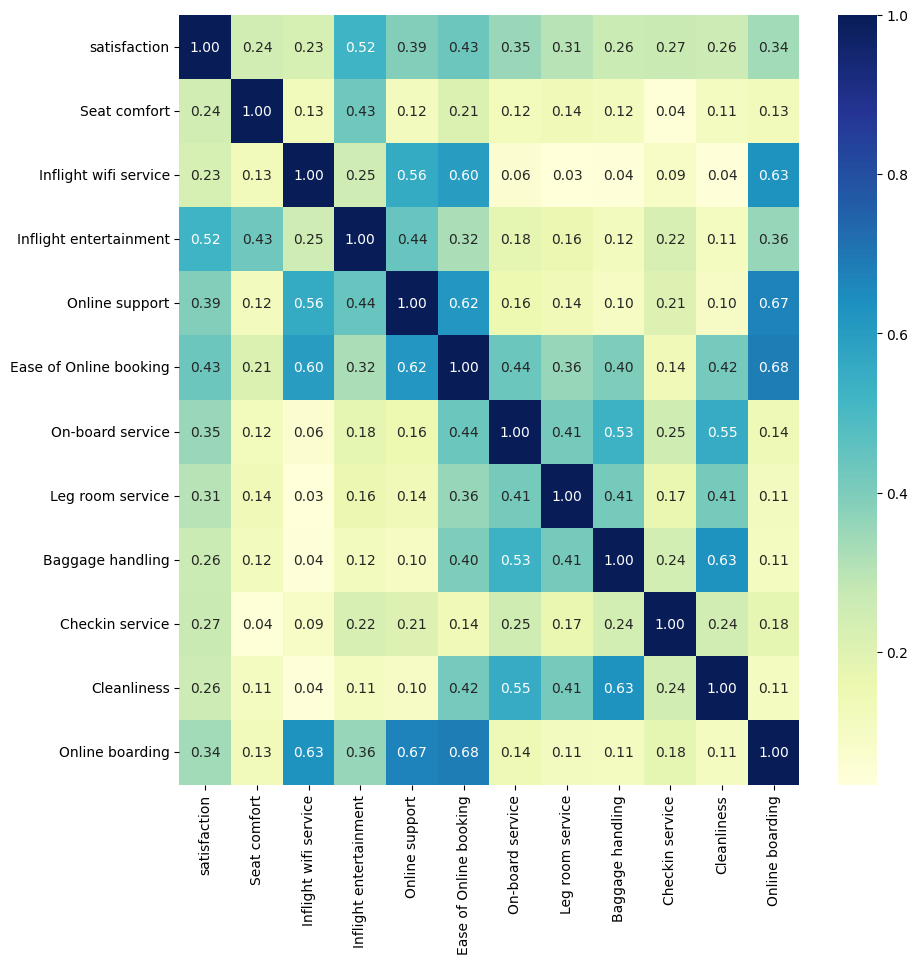

In [53]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

## **Displaying Dataframe Information**
This code block uses the info() method from the pandas library to display essential details about the DataFrame df. It shows the number of non-null entries for each column, the column data types, and other meta-information. This step is crucial for understanding the data structure and for identifying which columns may need further data preprocessing.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   satisfaction            129487 non-null  int64 
 1   Gender                  129487 non-null  object
 2   Class                   129487 non-null  object
 3   Seat comfort            129487 non-null  int64 
 4   Inflight wifi service   129487 non-null  int64 
 5   Inflight entertainment  129487 non-null  int64 
 6   Online support          129487 non-null  int64 
 7   Ease of Online booking  129487 non-null  int64 
 8   On-board service        129487 non-null  int64 
 9   Leg room service        129487 non-null  int64 
 10  Baggage handling        129487 non-null  int64 
 11  Checkin service         129487 non-null  int64 
 12  Cleanliness             129487 non-null  int64 
 13  Online boarding         129487 non-null  int64 
dtypes: int64(12), object(2)
memory usage

## **Converting Data Types to Category**
This code block converts the data types of the columns "Gender" and "Class" to "category" using pandas' astype() method. By specifying the data type as a category, it can improve performance and enable the use of categorical methods for these columns. This is particularly useful when the columns have a limited set of unique values and are not continuous.

In [55]:
df["Gender"] = df["Gender"].astype("category")
df["Class"] = df["Class"].astype("category")

## **One-Hot Encoding Gender and Class Features**
In this code block, we use one-hot encoding to transform the categorical columns "Gender" and "Class" into a format that could be provided to ML algorithms. For each unique category in "Gender" and "Class", one-hot encoding creates new columns that indicate the presence of each possible value in the original data.

* pd.get_dummies() is used to perform the one-hot encoding, and drop_first=True is used to avoid multicollinearity.
* After creating these new columns, the original "Gender" and "Class" columns are dropped from the DataFrame.
* Finally, we display the head of the DataFrame to ensure that the transformations were performed as expected.

In [56]:
Gender_ = pd.get_dummies(df["Gender"], drop_first=True)
Class_ = pd.get_dummies(df["Class"], drop_first=True)

df = pd.concat([df, Gender_, Class_], axis=1)

df.drop(["Gender", "Class"], axis=1, inplace=True)

df.head()

,satisfaction,Seat comfort,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Male,Eco,Eco Plus
0,1,0,2,4,2,3,3,0,3,5,3,2,0,1,0
1,1,0,0,2,2,3,4,4,4,2,3,2,1,0,0
2,1,0,2,0,2,2,3,3,4,4,4,2,0,1,0
3,1,0,3,4,3,1,1,0,1,4,1,3,0,1,0
4,1,0,4,3,4,2,2,0,2,4,2,5,0,1,0


## **Model Training and Evaluation using Logistic Regression**
In this code block, we accomplish several steps related to the training and evaluation of a logistic regression model aimed at predicting customer satisfaction.
1. We separate our DataFrame into features (x) and the target variable (y), which is "satisfaction" in this case.
2. The data is split into training (x_train, y_train) and testing (x_test, y_test) sets using an 80-20 ratio.
3. We initialize a Logistic Regression model (lr) and fit it on the training data.
4. The model is then used to make predictions on the test data (y_pred).
5. We calculate and print the accuracy score of the model on the test set, rounded to two decimal places.

In [57]:
x = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=101)

lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

accuracy = round(accuracy_score(y_pred, y_test)*100,2)

print(f"Accuracy Score: {accuracy}%")

Accuracy Score: 81.54%


## **Saving the Trained Model Using Pickle**
In this code block, we save the trained Logistic Regression model into a pickle file so that it can be loaded and used later without having to retrain.

1. We create a Python dictionary (data) to hold our trained Logistic Regression model (lr).
2. Using Python's pickle library, we open a new file named customer_satisfaction.pkl in write-binary mode (wb).
3. We then dump the data dictionary containing the model into this file.

In [45]:
data = {"model": lr}
with open("customer_satisfaction.pkl", "wb") as file:
  pickle.dump(data, file)

You can find the dataset <a href="https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction" target="_blank">here</a>